In [1]:
import numpy as np
import matplotlib.pyplot as plt
from disgrid import Data

In [2]:
import os
outputdirs = {d: f"output/{d}" for d in os.listdir("output") if os.path.isdir(f"output/{d}")}

In [3]:
outputdirs

{'a0.6_idm0_e0.2': 'output/a0.6_idm0_e0.2',
 'a1.0_idm1_e0.2': 'output/a1.0_idm1_e0.2',
 'a0.6_idm1_e0.1': 'output/a0.6_idm1_e0.1',
 'a1.0_idm0_e0.1': 'output/a1.0_idm0_e0.1',
 'a1.0_idm1_e0.3': 'output/a1.0_idm1_e0.3',
 'a1.0_idm0_e0.2': 'output/a1.0_idm0_e0.2',
 'a1.0_idm0_e0.3': 'output/a1.0_idm0_e0.3',
 'a0.6_idm1_e0.2': 'output/a0.6_idm1_e0.2',
 'a1.0_idm1_e0.1': 'output/a1.0_idm1_e0.1',
 'a0.6_idm0_e0.1': 'output/a0.6_idm0_e0.1'}

### Define some line styles

In [22]:
dgetters = {k : Data(v) for k, v in outputdirs.items()}

eccentricities = {k : k.split("_")[-1][1:] for k in outputdirs.keys()}
semis = {k : k.split("_")[0][1:] for k in outputdirs.keys()}
idms = {k : k.split("_")[1][3] for k in outputdirs.keys()}

lss = {"0" : "-", "1" : "--"}
colors = {"0.1" : "C0", "0.2" : "C1", "0.3" : "C2"}

def get_style(name):
    e = eccentricities[name]
    idm = idms[name]

    ls = lss[idm]
    color = colors[e]

    idm = idms[name]
    ls = lss[idm]

    if a == "0.6":
        color = 

### Disk eccentricities and disk masses

(0.0, 0.5)

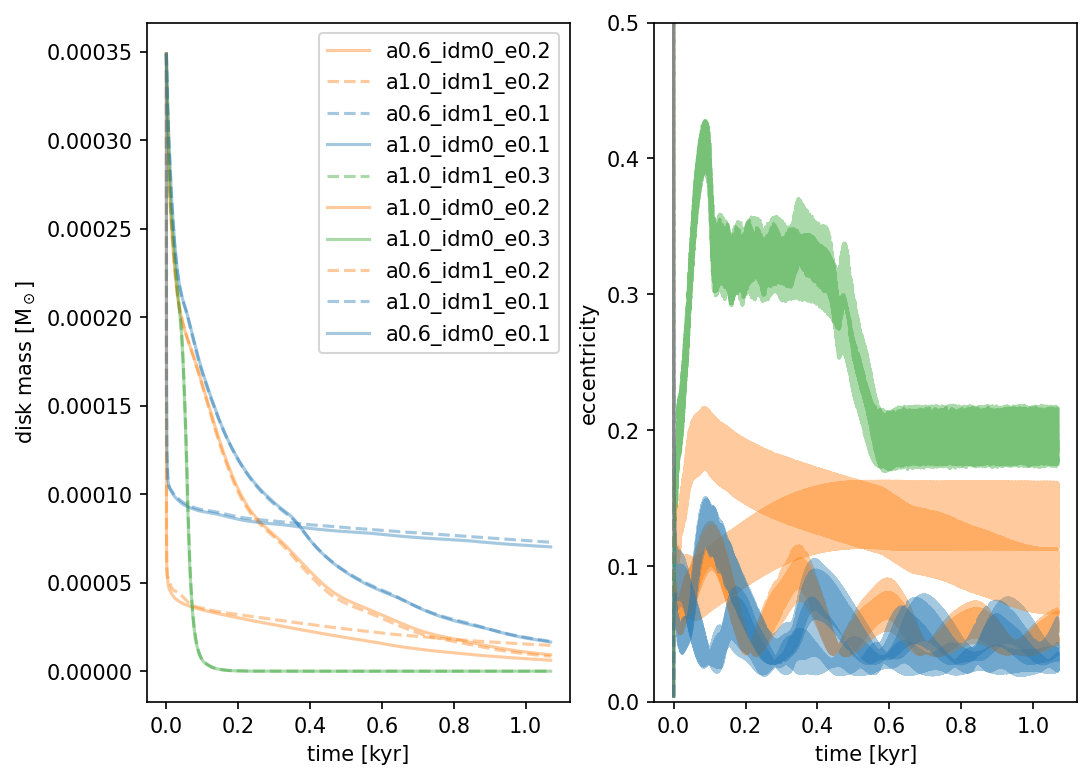

In [19]:
fig, axd = plt.subplot_mosaic([["diskmass", "eccentricity"]], figsize=(8,6), dpi=150)


for name, dget in dgetters.items():

    color = colors[e]
    data = dget.get(var="mass", dim="scalar")
    x = data.time.to_value("kyr")
    y = data.data.to_value("solMass")
    axd["diskmass"].plot(x, y, label=name, color=color, ls=ls, alpha=0.4)

    data = dget.get(var="eccentricity", dim="scalar")
    x = data.time.to_value("kyr")
    y = data.data.value
    axd["eccentricity"].plot(x, y, label=name, color=color, ls=ls, alpha=0.4)

    

axd["diskmass"].set_xlabel("time [kyr]")
axd["diskmass"].set_ylabel("disk mass [M$_\odot$]")
axd["diskmass"].legend()

axd["eccentricity"].set_xlabel("time [kyr]")
axd["eccentricity"].set_ylabel("eccentricity")
axd["eccentricity"].set_ylim(bottom=0.0, top=0.5)
# axd["eccentricity"].legend()

### Surface density profiles

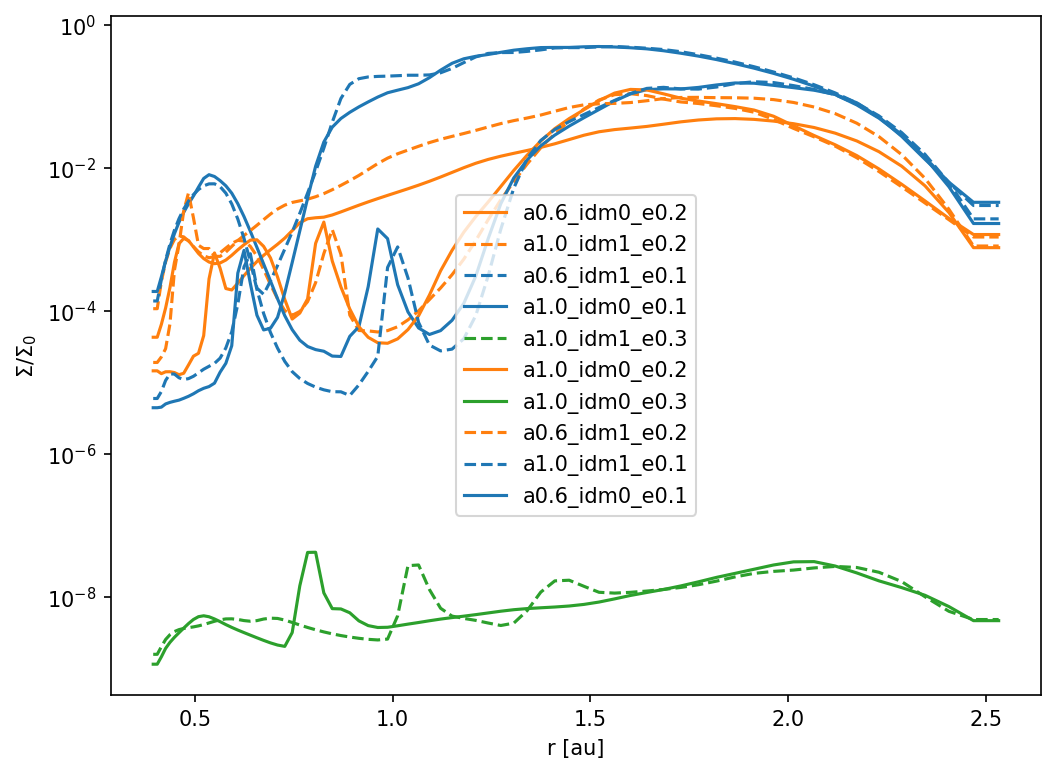

In [23]:
fig, ax = plt.subplots(figsize=(8,6), dpi=150)

for name, dget in dgetters.items():
    e = eccentricities[name]
    ls = lss[idm]
    color = colors[e]

    field = dget.get(var="mass density", N=1000, dim="2d")
    field0 = dget.get(var="mass density", N=0, dim="2d")

    x = field.grid.r_c.to_value("au")
    y = np.average(field.data.to_value("g/cm**2"),axis=1)
    y0 = np.average(field0.data.to_value("g/cm**2"),axis=1)

    
    ax.plot(x, y/y0, label=name, color=color, ls=ls)

ax.set_yscale("log")
ax.set_xlabel("r [au]")
ax.set_ylabel(r"$\Sigma/\Sigma_0$")
ax.legend()

### Planet migration

KeyError: '6'

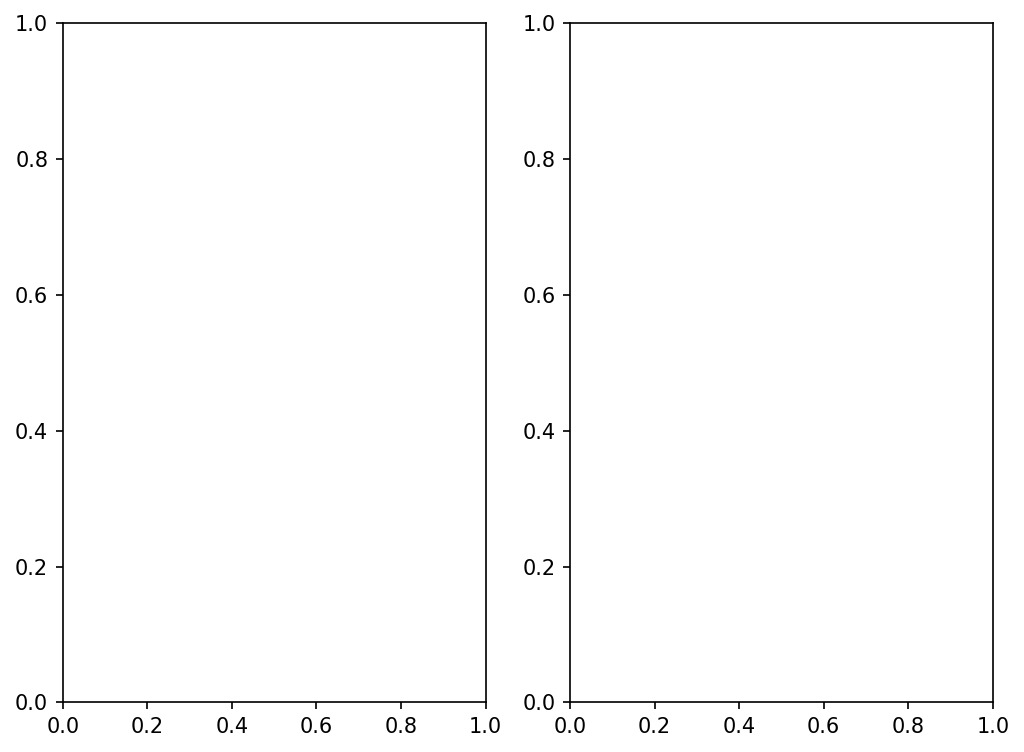

In [6]:
fig, axd = plt.subplot_mosaic([["a", "eccentricity"]], figsize=(8,6), dpi=150)

dgetters = {k : Data(v) for k, v in outputdirs.items()}

eccentricities = {k : k.split("_")[-1][1:] for k in outputdirs.keys()}
idms = {k : k.split("_")[0][3] for k in outputdirs.keys()}

lss = {"0" : "-", "1" : "--"}
colors = {"0.1" : "C0", "0.2" : "C1", "0.3" : "C2"}

for name, dget in dgetters.items():
    e = eccentricities[name]
    idm = idms[name]
    ls = lss[idm]
    color = colors[e]
    data = dget.get(var="semi-major axis", planet=1)
    x = data.time.to_value("kyr")
    y = data.data.to_value("au")
    axd["a"].plot(x, y, label=name, color=color, ls=ls, alpha=0.4)

    data = dget.get(var="eccentricity", planet=1)
    x = data.time.to_value("kyr")
    y = data.data.value
    axd["eccentricity"].plot(x, y, label=name, color=color, ls=ls, alpha=0.4)

    

axd["a"].set_xlabel("time [kyr]")
axd["a"].set_ylabel("semi-major axis [au]")
axd["a"].legend()

axd["eccentricity"].set_xlabel("time [kyr]")
axd["eccentricity"].set_ylabel("eccentricity")
# axd["eccentricity"].legend()